In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,accuracy_score,roc_curve,roc_auc_score,recall_score,auc
from mlxtend.plotting import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/heart_data.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Dataset Description**

**age:** Age of the patient

**sex:** Gender of the patient (1=male, 0=female)

**chest pain type (cp):** Categorized into 4 values

**resting blood pressure (trestbps):** The patient's resting blood pressure

**serum cholesterol (chol):** The level of cholesterol in the blood, measured in milligrams per deciliter (mg/dl)

**fasting blood sugar (fbs):** Binary indicator (1 if fasting blood sugar > 120 mg/dl, 0 otherwise)

**resting electrocardiographic results (restecg):** Categorized into values 0, 1, 2 -- Values: [normal, stt abnormality, lv hypertrophy]

**maximum heart rate achieved (thalach):** The highest heart rate during exercise

**exercise-induced angina (exang):** Binary indicator for exercise-induced angina (True/ False) (1/0)

**oldpeak:** ST depression induced by exercise relative to rest.

**slope:** The slope of the peak exercise ST segment. (downsloping/flat/upsloping)

**number of major vessels colored by fluoroscopy (ca):** Ranges from 0 to 3.

**thal:** Categorized as 0 = normal, 1 = fixed defect, 2 = reversible defect.

The **target** indicates the presence of heart disease in the patient, with integer values: 0 = no disease, 1 = disease.

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data has no missing values.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


All of the columns are of the int64 data type except 'oldpeak' which is a float64 data type.

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The average age of the patients is approximately 54.4 years, with the youngest at 29 and the oldest at 77.

The average resting blood pressure (trestbps) is about 131.6 mm Hg, ranging from 94 to 200 mm Hg.

The average cholesterol level (chol) is 246 mg/dL, with a range of 126 to 564 mg/dL.

The average maximum heart rate (thalach) is roughly 149.1, with a range of 71-202.

The average ST depression induced by exercise relative to rest (oldpeak) is about 1.07, with values ranging from 0 to 6.20.

**Target Distribution | 0 = no disease, 1 = disease**

In [ ]:
data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

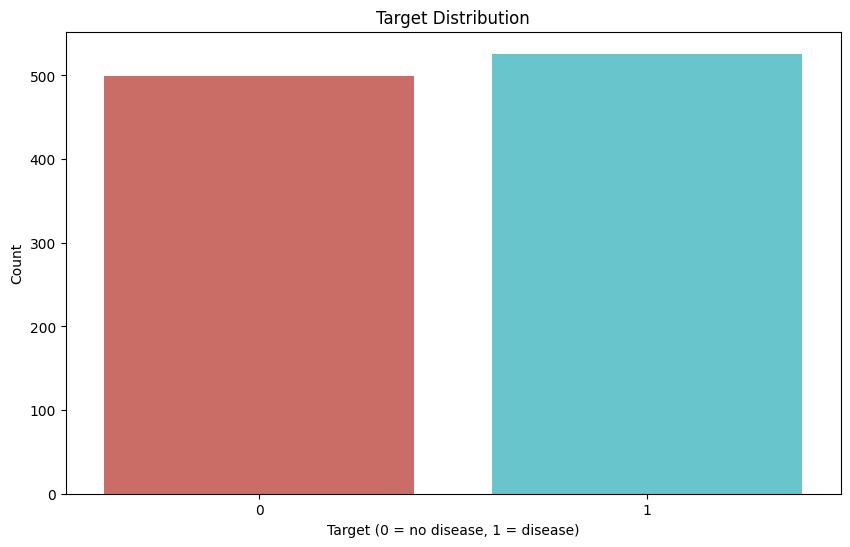

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Target Distribution')
ax = sns.countplot(x=data['target'], palette='hls')
plt.xlabel('Target (0 = no disease, 1 = disease)')
plt.ylabel('Count')
plt.show()

The dataset is nearly balanced in terms of heart disease presence, with about 51.3% having it and 48.7% not having it.

**Age Distribution**

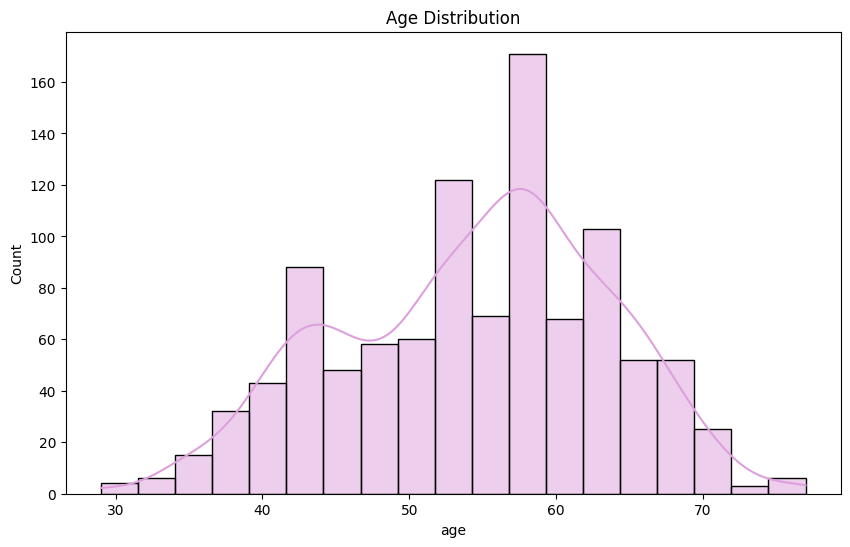

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, color="plum")
plt.title('Age Distribution')
plt.show()

The age column distribution is normaly distributed because we can clearly see the bell curve.

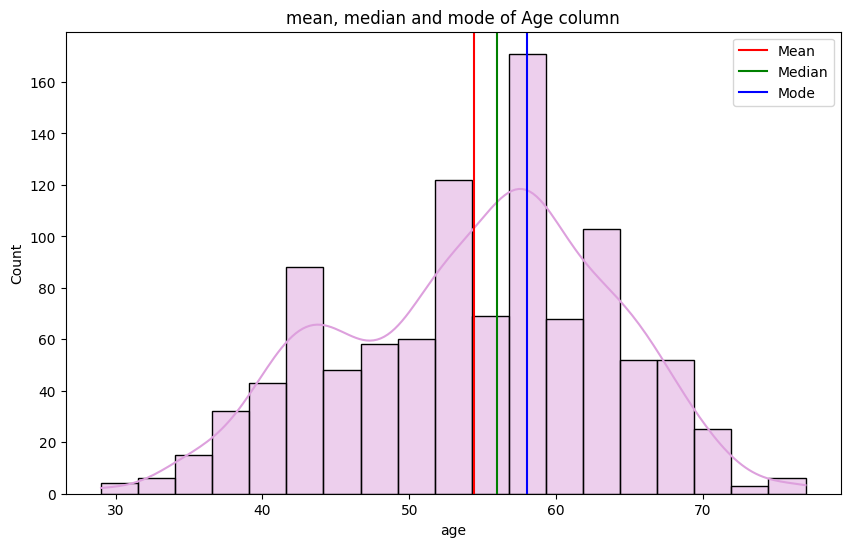

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, color="plum")
plt.axvline(data['age'].mean(), color='red', label='Mean')
plt.axvline(data['age'].median(), color='green', label='Median')
plt.axvline(data['age'].mode()[0], color='blue', label='Mode')
plt.title('mean, median and mode of Age column')
plt.legend()
plt.show()

**Gender Distribution**

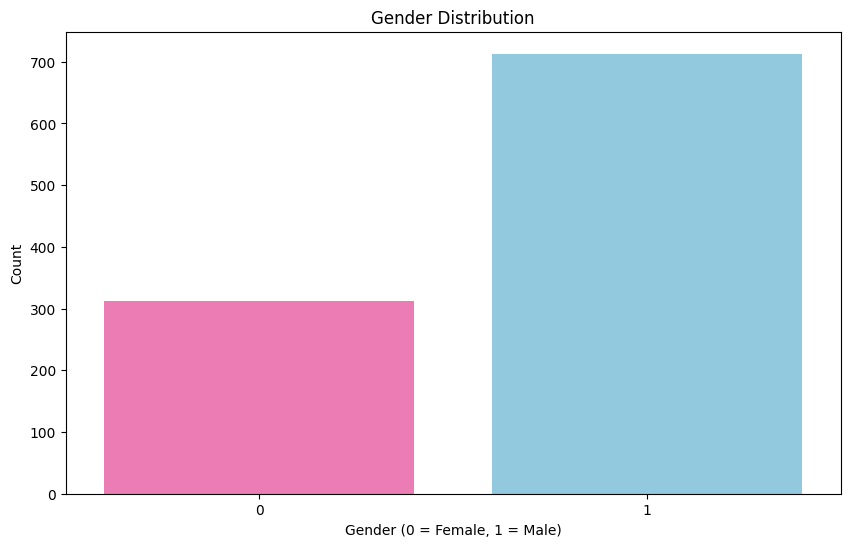

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Gender Distribution')
ax = sns.countplot(x=data['sex'], palette=['hotpink', 'skyblue'])
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

In [ ]:
male_count = 713
female_count = 312

total_count = male_count + female_count

male_percentage = (male_count/total_count)*100
female_percentages = (female_count/total_count)*100

print(f'Male percentage in the data: {male_percentage:.2f}%')
print(f'Female percentage in the data : {female_percentages:.2f}%')

Male percentage in the data: 69.56%
Female percentage in the data : 30.44%


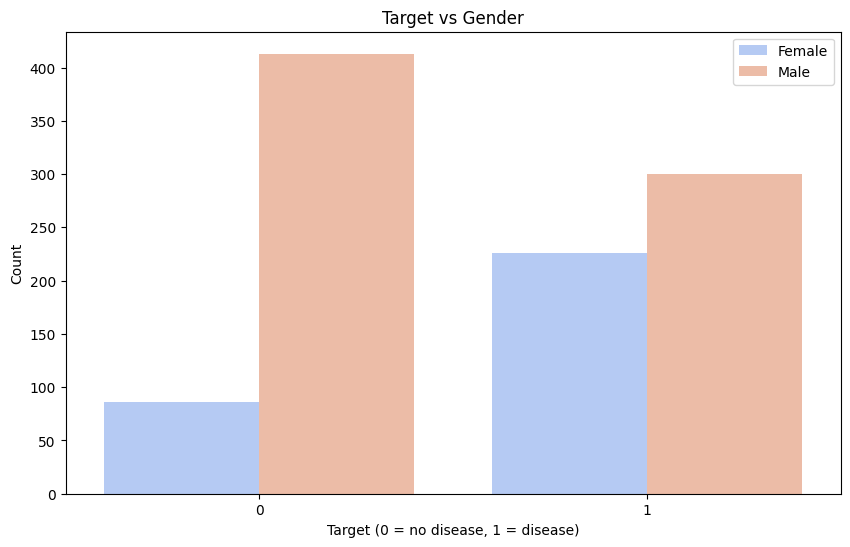

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Target vs Gender')
sns.countplot(x=data['target'], hue=data['sex'], palette='coolwarm')
plt.xlabel('Target (0 = no disease, 1 = disease)')
plt.ylabel('Count')
plt.legend(labels=['Female', 'Male'], loc='upper right')
plt.show()

**Chest Pain Distribution**

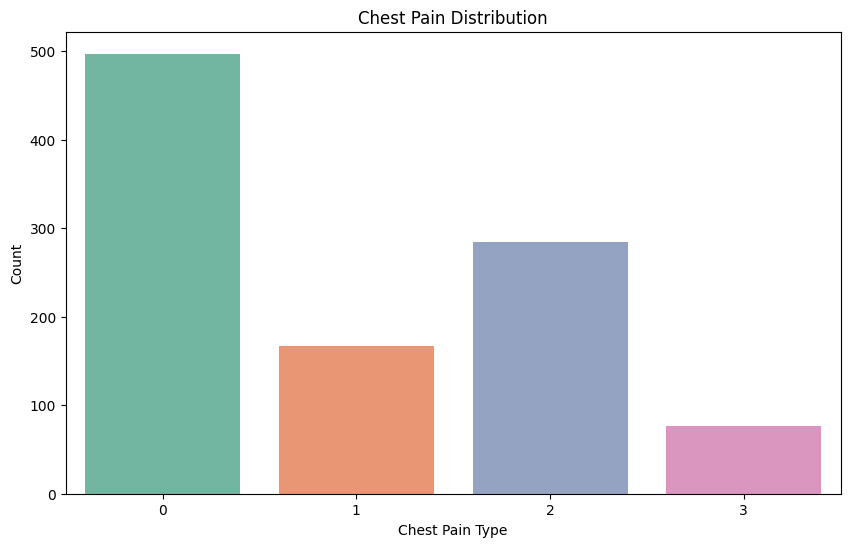

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Chest Pain Distribution')
ax = sns.barplot(x=data['cp'].value_counts().index, y=data['cp'].value_counts().values, palette='Set2')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')

plt.show()

The dataset shows different types of chest pain among patients. Type 0 (Typical angina) is the most common, and the exact distribution of chest pain types can be seen in the bar plots.

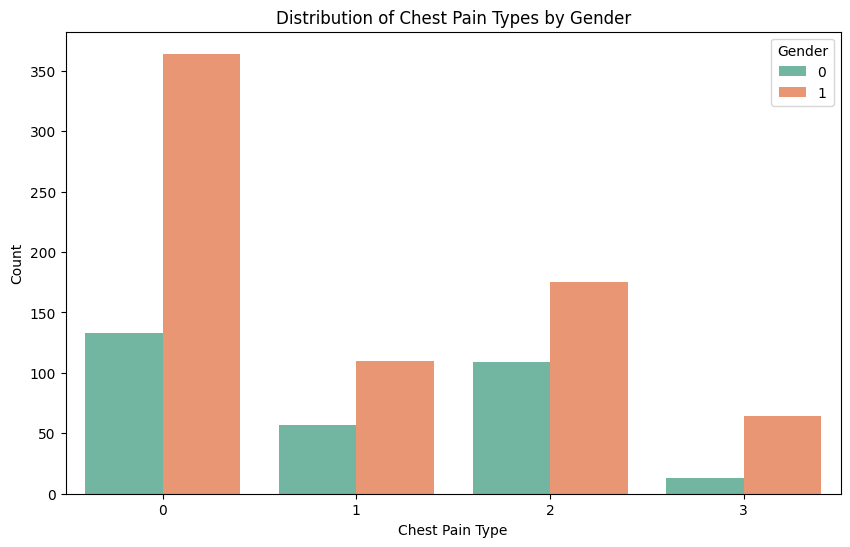

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of Chest Pain Types by Gender')
sns.countplot(data=data, x='cp', hue='sex', palette='Set2')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right')
plt.show()

**Resting Blood Pressure**

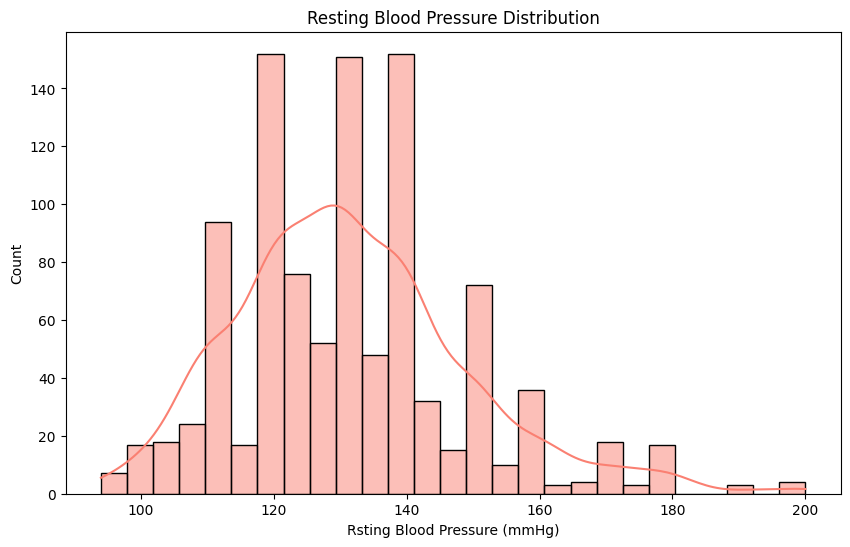

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Resting Blood Pressure Distribution')
sns.histplot(data['trestbps'], kde=True, color='salmon')
plt.xlabel('Rsting Blood Pressure (mmHg)')
plt.ylabel('Count')
plt.show()

The resting blood pressure for most individuals is concentrated around 120-140 mm Hg

**Histplot of trestbps column to analyse with gender**

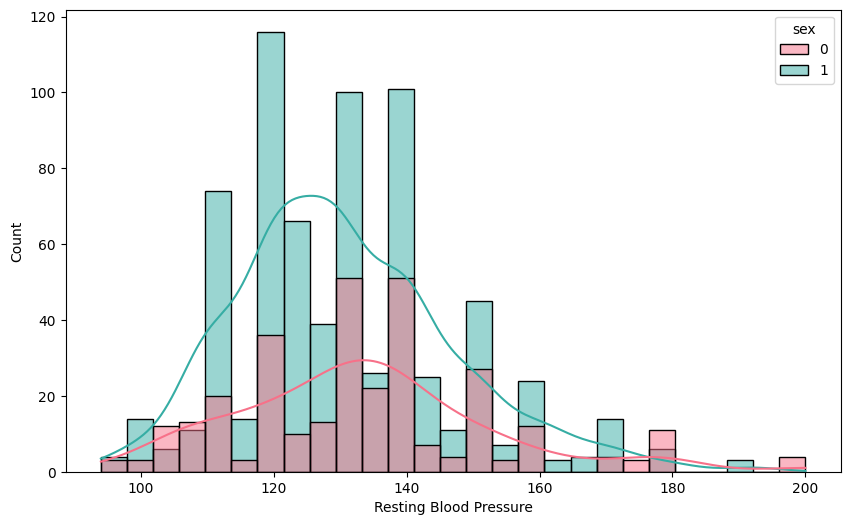

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data, x='trestbps', kde=True, palette = "husl", hue ='sex')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Count')
plt.show()

**Serum cholesterol (Chol)**

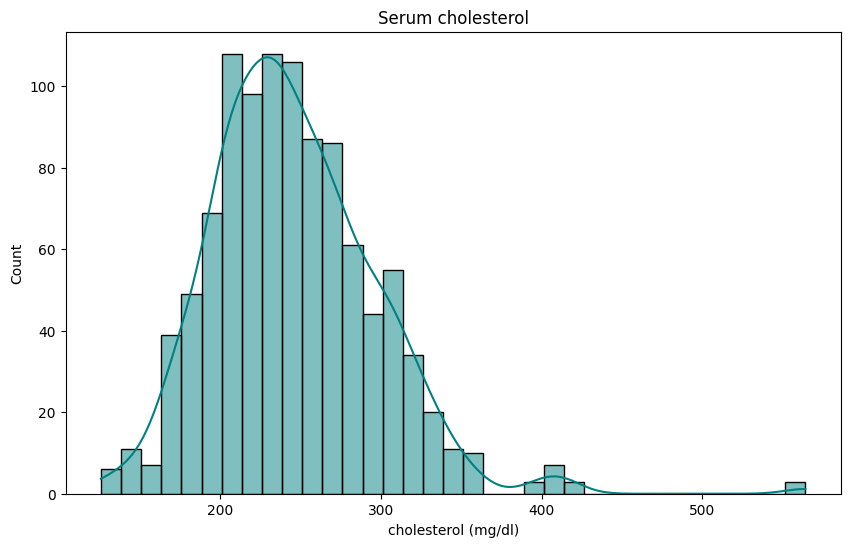

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Serum cholesterol')
sns.histplot(data['chol'], kde=True, color='teal')
plt.xlabel('cholesterol (mg/dl)')
plt.ylabel('Count')
plt.show()

Most individuals have cholesterol levels between 200 and 300 mg/dl.

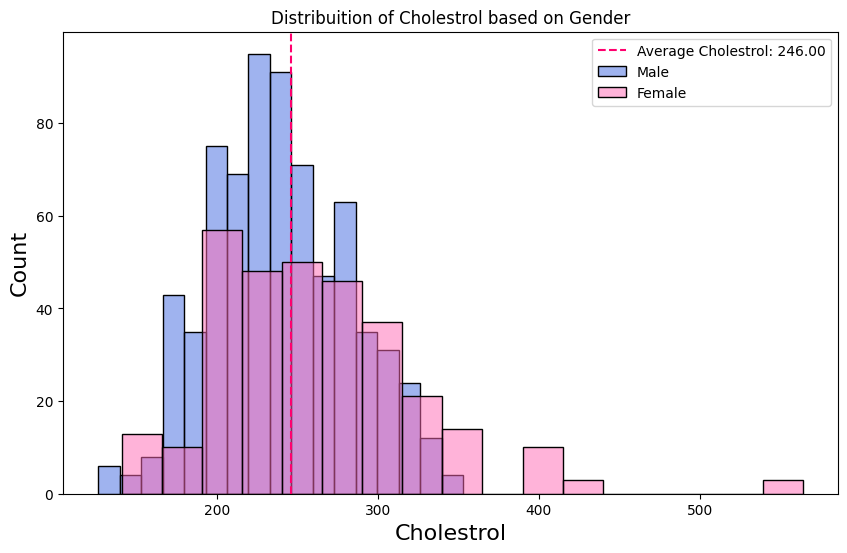

In [ ]:
average_chol = np.mean(data['chol'])

plt.figure(figsize=(10,6))
plt.title('Distribuition of Cholestrol based on Gender')
sns.histplot(data[data['sex']==1]['chol'], alpha=0.5, color='#4169E1', label='Male')
sns.histplot(data[data['sex']==0]['chol'], alpha=0.5, color='#FF69B4', label='Female')
plt.axvline(x=average_chol, color='#ff006e', linestyle='--', label=f'Average Cholestrol: {average_chol:.2f}')
plt.xlabel('Cholestrol', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()

**Fasting blood sugar Distribution**

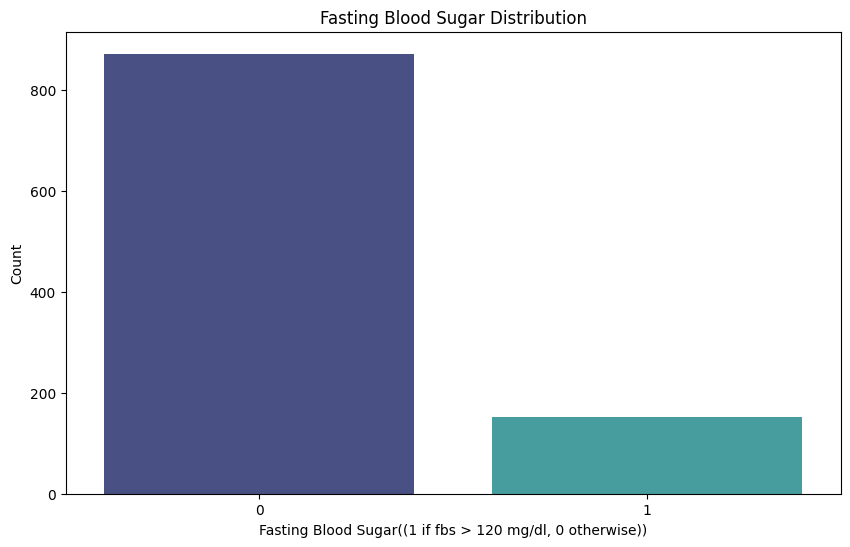

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Fasting Blood Sugar Distribution')
sns.barplot(x=data['fbs'].value_counts().index, y=data['fbs'].value_counts().values, palette='mako')
plt.xlabel('Fasting Blood Sugar((1 if fbs > 120 mg/dl, 0 otherwise))')
plt.ylabel('Count')
plt.show()

Most patients have fasting blood sugar levels below 120 mg/dl, indicating that high blood sugar is uncommon in this dataset.

**Resting electrocardiographic results distribution**

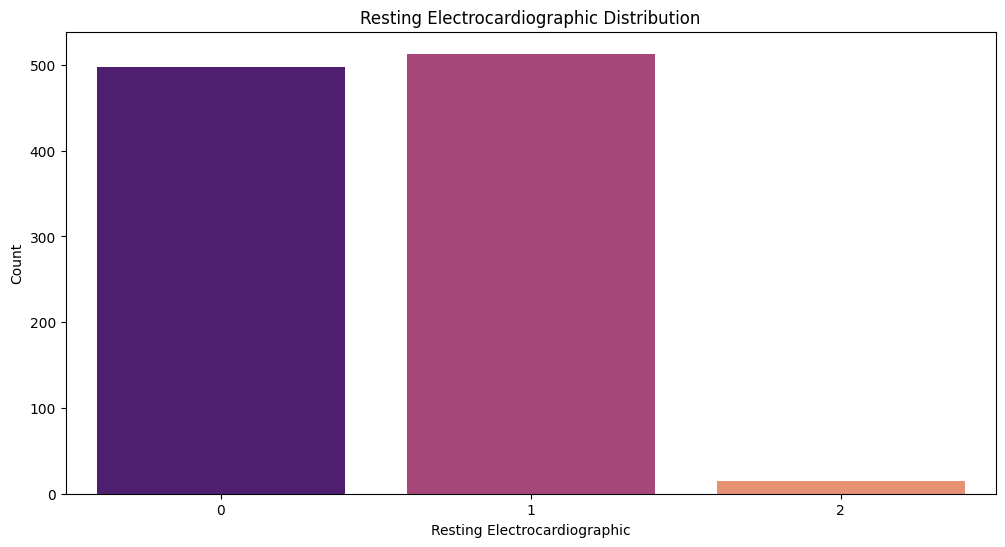

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Resting Electrocardiographic Distribution')
sns.barplot(x=data['restecg'].value_counts().index, y=data['restecg'].value_counts().values, palette='magma')
plt.xlabel('Resting Electrocardiographic')
plt.ylabel('Count')
plt.show()

The results show different resting electrocardiographic outcomes, with some types being more common than others. The exact distribution can be seen in the plots.

**Maximum heart rate**

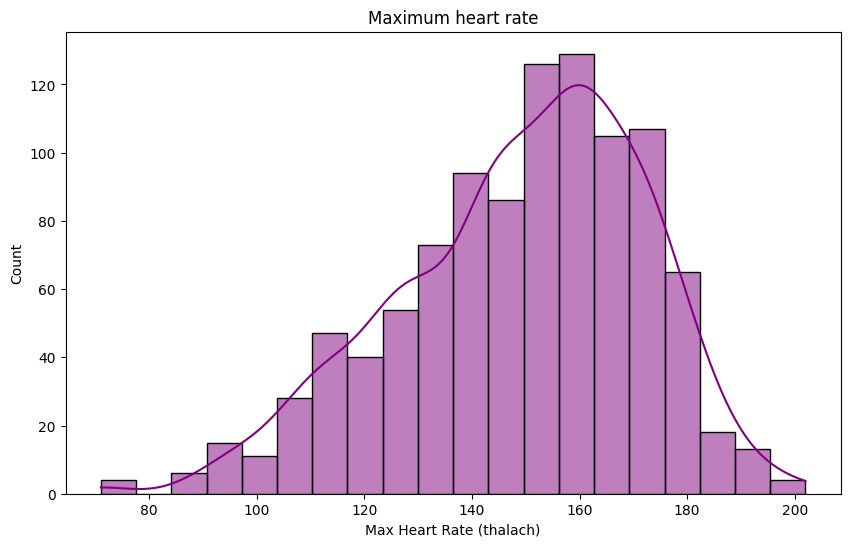

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Maximum heart rate')
sns.histplot(data['thalach'], kde=True, color='purple')
plt.xlabel('Max Heart Rate (thalach)')
plt.ylabel('Count')
plt.show()

Most individuals achieve a heart rate between 140 and 175 bpm during a stress test.

**Exercise-induced angina - (True/ False) (1/0)**

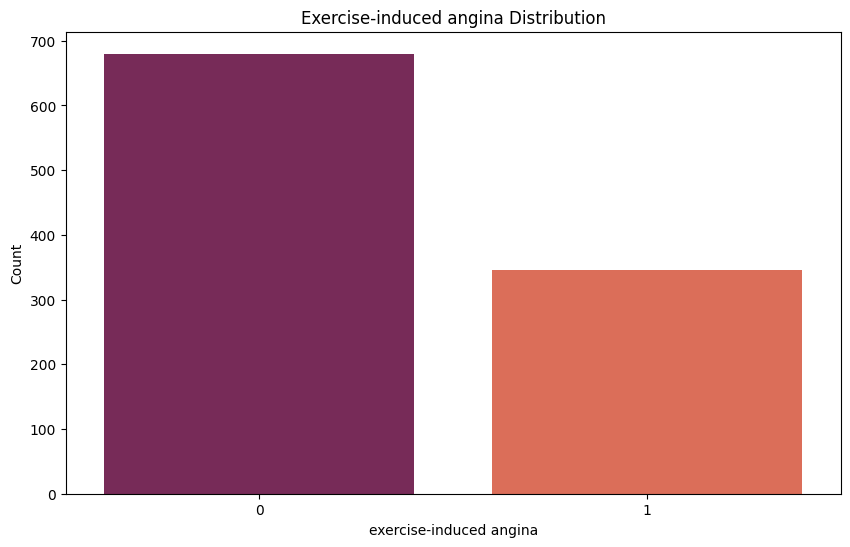

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Exercise-induced angina Distribution')
sns.barplot(x=data['exang'].value_counts().index, y=data['exang'].value_counts().values, palette='rocket')
plt.xlabel('exercise-induced angina')
plt.ylabel('Count')
plt.show()

Most patients do not experience exercise-induced angina, suggesting it is not a common symptom in this dataset.

**oldpeak (ST depression)**

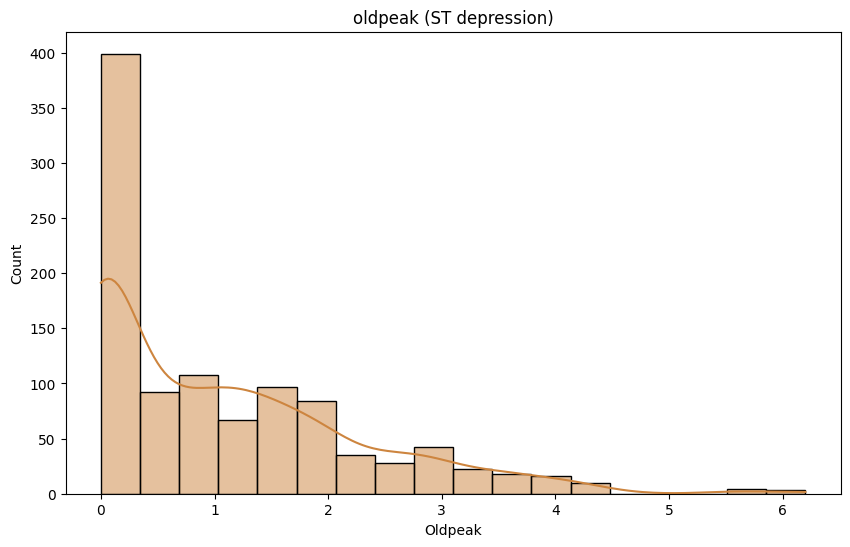

In [ ]:
plt.figure(figsize=(10,6))
plt.title('oldpeak (ST depression)')
sns.histplot(data['oldpeak'], kde=True, color='peru')
plt.xlabel('Oldpeak')
plt.ylabel('Count')
plt.show()

Most of the values are concentrated near 0, indicating that many individuals did not experience significant ST depression during exercise.

**Slope Distribution - Values: [normal, stt abnormality, lv hypertrophy]**

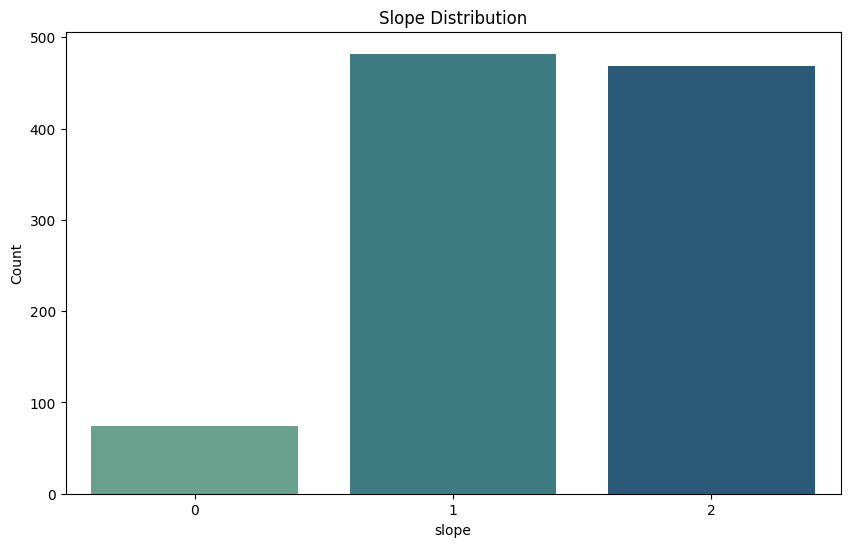

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Slope Distribution')
sns.barplot(x=data['slope'].value_counts().index, y=data['slope'].value_counts().values, palette='crest')
plt.xlabel('slope')
plt.ylabel('Count')
plt.show()

The dataset shows different slopes of the peak exercise ST segment. A specific type might be more common, and its distribution can be seen in the bar plots.

**Number of major vessels colored by fluoroscopy**

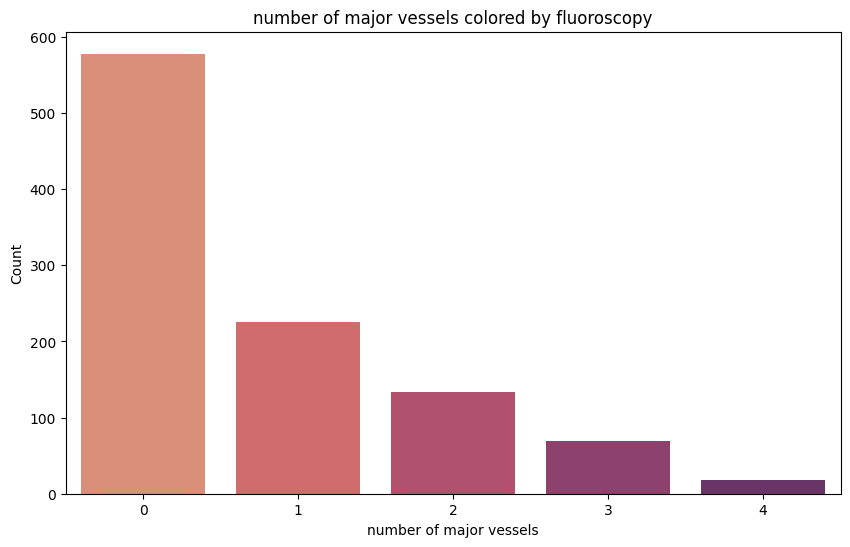

In [ ]:
plt.figure(figsize=(10,6))
plt.title('number of major vessels colored by fluoroscopy')
sns.barplot(x=data['ca'].value_counts().index, y=data['ca'].value_counts().values, palette='flare')
plt.xlabel('number of major vessels')
plt.ylabel('Count')
plt.show()

Most patients have fewer major vessels colored by fluoroscopy, with '0' being the most common.

**thal distribution | 0 = normal, 1 = fixed defect, 2 = reversible defect**

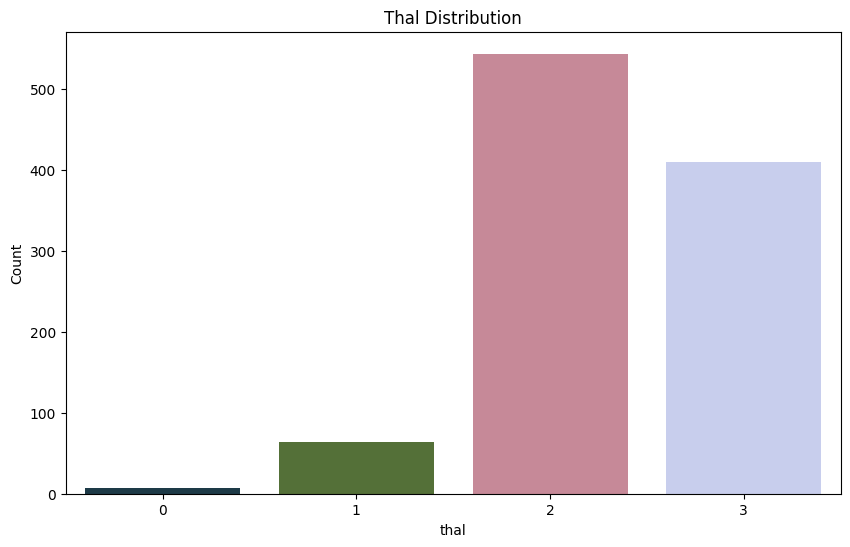

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Thal Distribution')
sns.barplot(x=data['thal'].value_counts().index, y=data['thal'].value_counts().values, palette='cubehelix')
plt.xlabel('thal')
plt.ylabel('Count')
plt.show()

**Histogram**

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

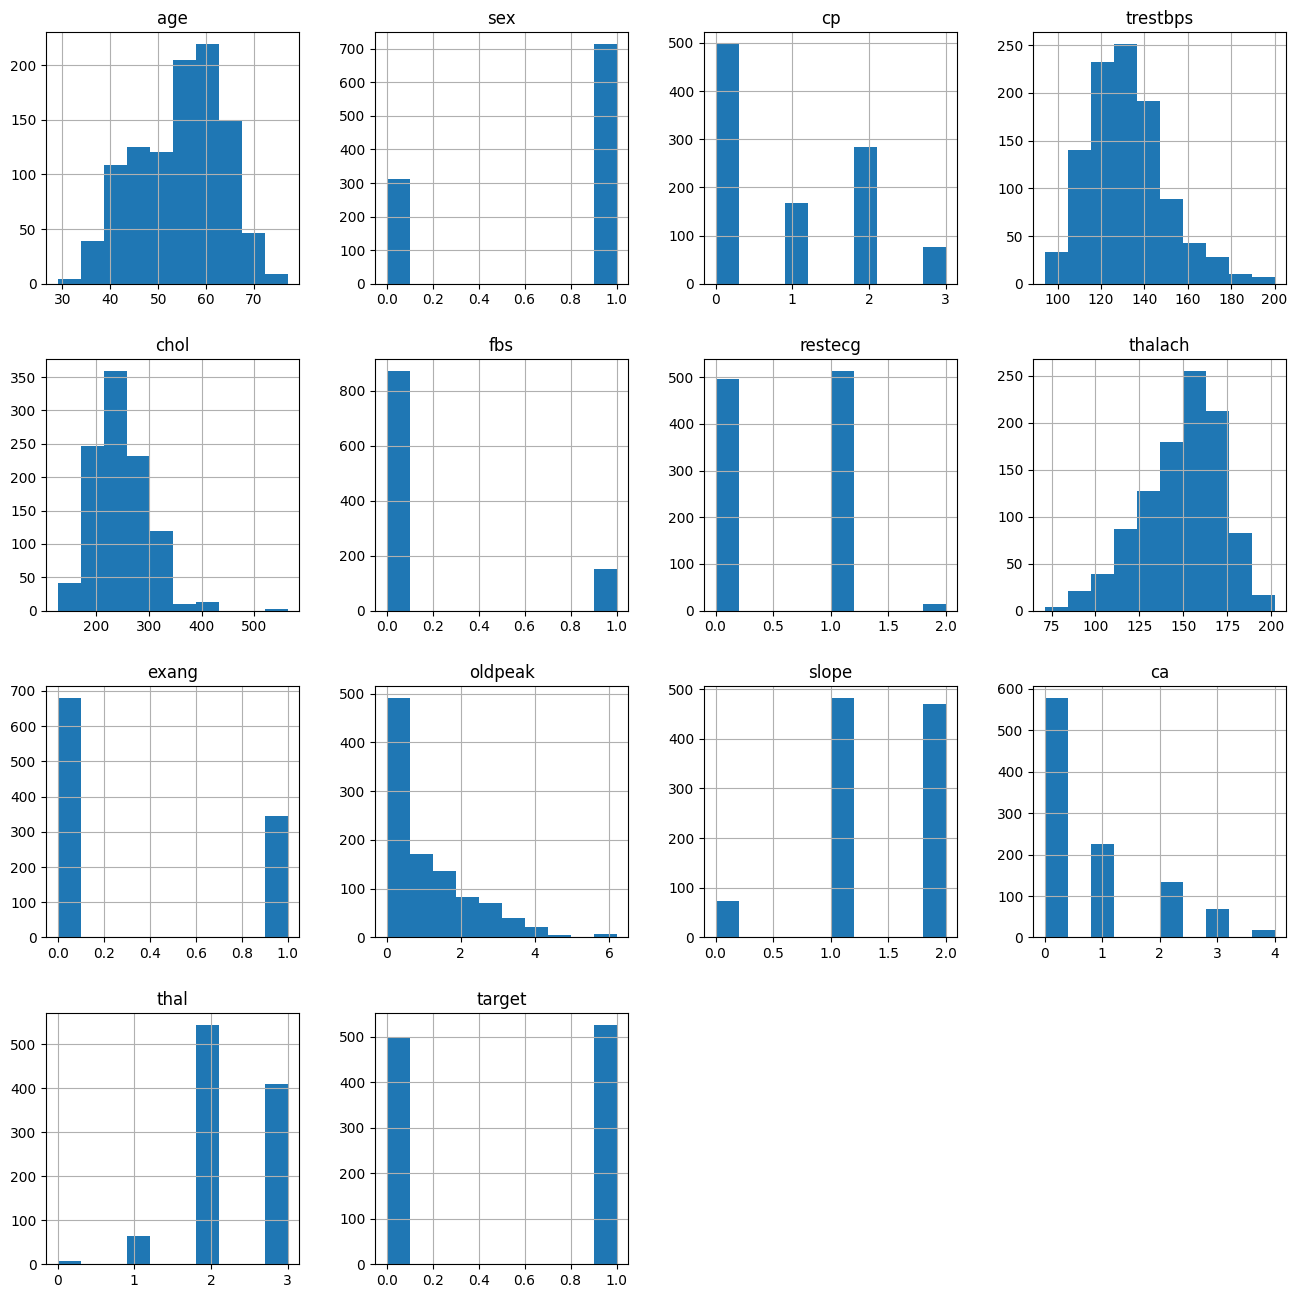

In [ ]:
data.hist(figsize=(16,16))

**Removing Outliers**

In [ ]:
continuous_variables = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [ ]:
df = data.copy()

for column in continuous_variables:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df.reset_index(inplace=True, drop=True)

In [ ]:
df.shape

(964, 14)

**Correlation Heatmap**

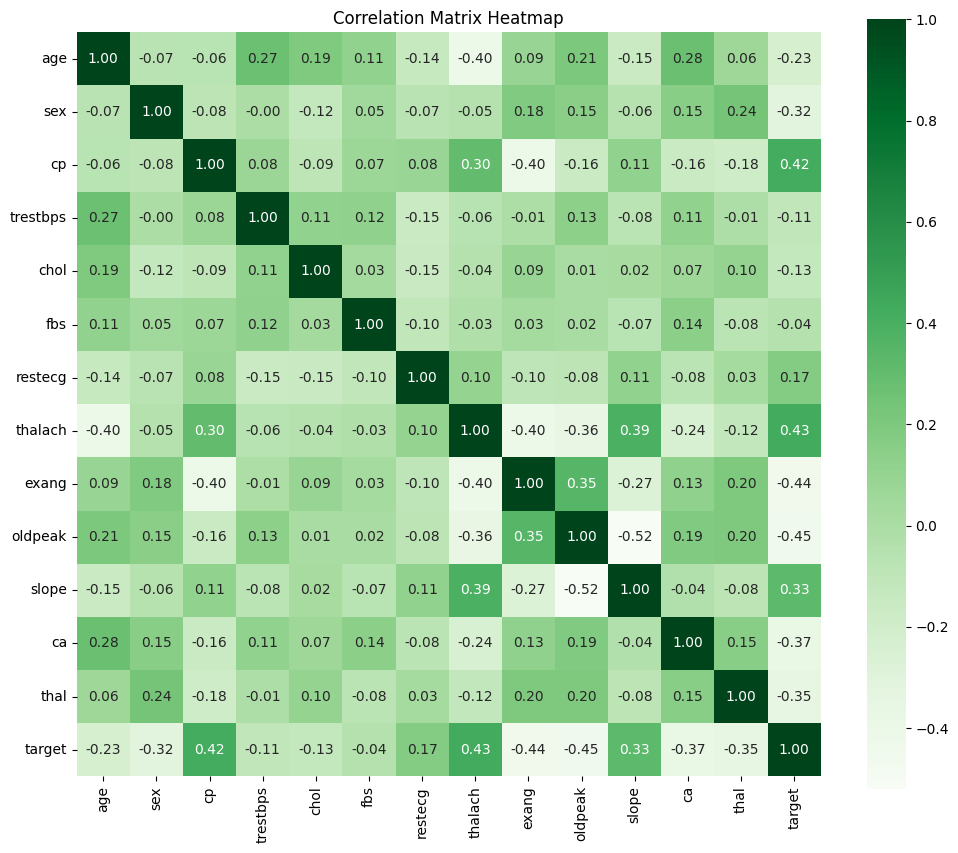

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='Greens', square=True)
plt.title('Correlation Matrix Heatmap')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

The heatmap shows that there is a positive correlation between 'cp' and the target variable, indicating that individuals experiencing higher levels of chest pain are more likely to have heart disease. Besides chest pain (cp), the variables 'thalach' and 'slope' also show a positive correlation with the target variable. This suggests that higher values in these variables are associated with an increased likelihood of heart disease.

On the other hand, 'Exang' and the target variable have a negative connection, indicating that while exercising, the heart requires more blood, but narrowed arteries reduce blood flow, lowering the likelihood of heart disease detection. Furthermore, the variables 'ca', 'oldpeak', and 'thal' show a negative correlation with the target variable, implying that greater values in these variables are associated with a decreased risk of heart disease.

**Feature Selection**

In [ ]:
X = df.drop(['target'], axis = 1)
y = df['target']

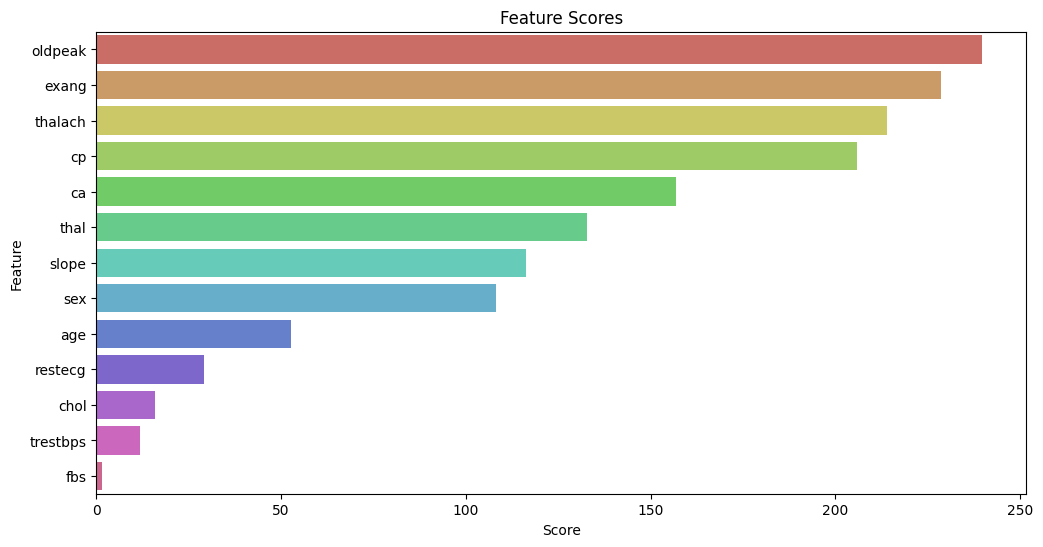

In [ ]:
selector = SelectKBest(f_classif, k=13)
X_selected = selector.fit_transform(X, y)

selected_feature_names = X.columns[selector.get_support()]
selected_feature_scores = selector.scores_[selector.get_support()]

feature_scores = pd.DataFrame({'Feature': selected_feature_names, 'Score': selected_feature_scores})
feature_scores = feature_scores.sort_values(by = 'Score', ascending = False)

plt.figure(figsize=(12, 6))
sns.barplot(x = 'Score', y = 'Feature', data = feature_scores, palette = 'hls')
plt.title('Feature Scores')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()

trestbps, chol, fbs, and restecg have the low scores, so we have to drop these features.

In [ ]:
X = X.drop(['trestbps', 'chol', 'fbs', 'restecg'], axis=1)

In [ ]:
continuous_features = ['age', 'thalach', 'oldpeak']

Now we have features stored in 'X' and target in 'y'.

**Splitting Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify = y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(723, 9)
(241, 9)
(723,)
(241,)


In [ ]:
scaler = StandardScaler()

X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

**Random Forest Classifier**

In [ ]:
rf = RandomForestClassifier(n_estimators=70, criterion='gini', max_depth=4, min_samples_split=4)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_split=4, n_estimators=70)

In [ ]:
prediction_rf = rf.predict(X_test)

In [ ]:
print(round(accuracy_score(y_test, prediction_rf)*100,2))

88.8


In [ ]:
print(classification_report(y_train, rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       342
           1       0.90      0.93      0.92       381

    accuracy                           0.91       723
   macro avg       0.91      0.91      0.91       723
weighted avg       0.91      0.91      0.91       723



In [ ]:
print(classification_report(y_test, prediction_rf))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       114
           1       0.90      0.88      0.89       127

    accuracy                           0.89       241
   macro avg       0.89      0.89      0.89       241
weighted avg       0.89      0.89      0.89       241



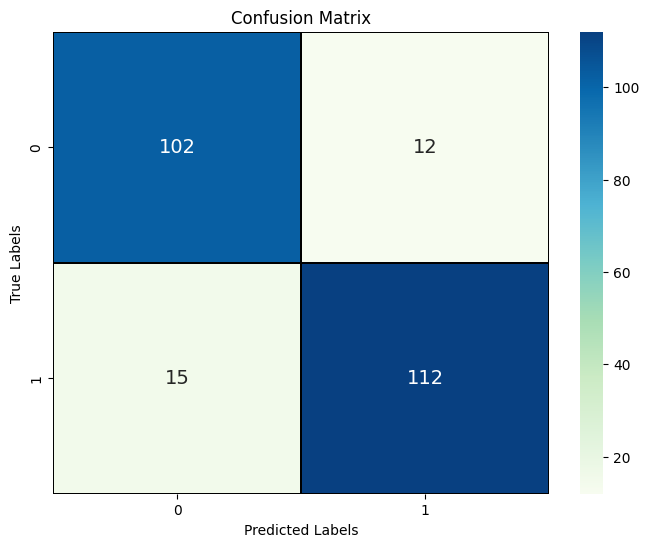

In [ ]:
cm_1 = confusion_matrix(y_test, prediction_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_1, annot=True, cmap='GnBu', fmt='d', annot_kws={"size": 14}, linewidths=0.3, linecolor='black')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels',)
plt.title('Confusion Matrix')
plt.show()

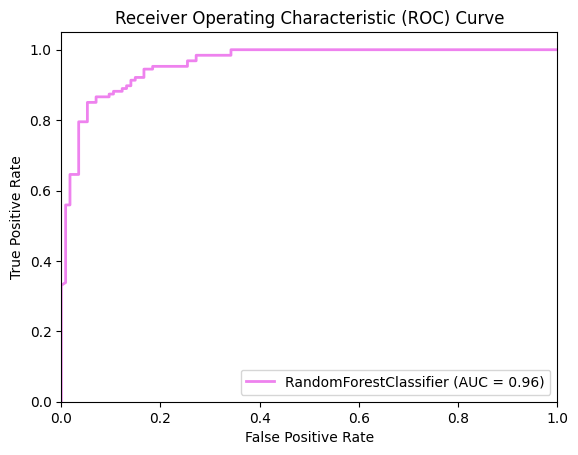

In [ ]:
y_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='violet', lw=2, label=f'RandomForestClassifier (AUC = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**SVM Classifier**

In [ ]:
svm = SVC(C=1, kernel='rbf', degree=2, gamma='scale', probability=True)

In [ ]:
svm.fit(X_train, y_train)

SVC(C=1, degree=2, probability=True)

In [ ]:
prediction_svm = svm.predict(X_test)

In [ ]:
print(round(accuracy_score(prediction_svm, y_test)*100,2))

87.55


In [ ]:
print(classification_report(y_train, svm.predict(X_train)))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       342
           1       0.89      0.94      0.91       381

    accuracy                           0.90       723
   macro avg       0.91      0.90      0.90       723
weighted avg       0.91      0.90      0.90       723



In [ ]:
print(classification_report(y_test, prediction_svm))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       114
           1       0.88      0.89      0.88       127

    accuracy                           0.88       241
   macro avg       0.88      0.87      0.88       241
weighted avg       0.88      0.88      0.88       241



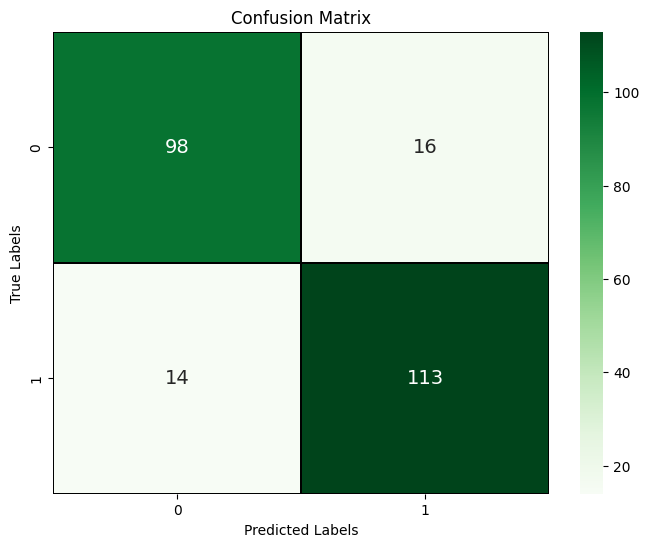

In [ ]:
cm_2 = confusion_matrix(y_test, prediction_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_2, annot=True, cmap='Greens', fmt='d', annot_kws={"size": 14}, linewidths=0.3, linecolor='black')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels',)
plt.title('Confusion Matrix')
plt.show()

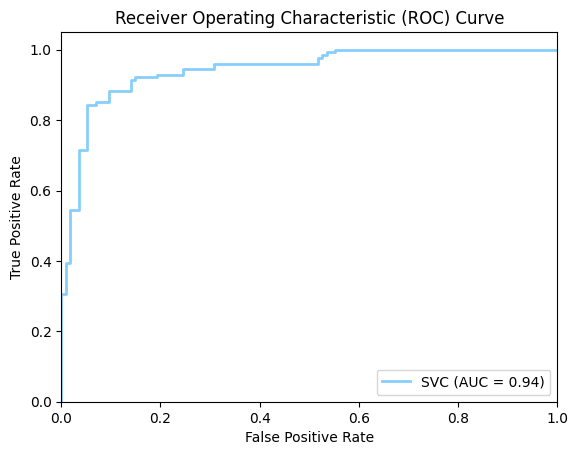

In [ ]:
y_proba = svm.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='lightskyblue', lw=2, label=f'SVC (AUC = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20, algorithm="auto" )

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
prediction_knn = knn.predict(X_test)

In [ ]:
print(round(accuracy_score(prediction_knn, y_test)*100,2))

83.82


In [ ]:
print(classification_report(y_train, knn.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       342
           1       0.87      0.92      0.89       381

    accuracy                           0.88       723
   macro avg       0.89      0.88      0.88       723
weighted avg       0.89      0.88      0.88       723



In [ ]:
print(classification_report(y_test, prediction_knn))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       114
           1       0.85      0.84      0.85       127

    accuracy                           0.84       241
   macro avg       0.84      0.84      0.84       241
weighted avg       0.84      0.84      0.84       241



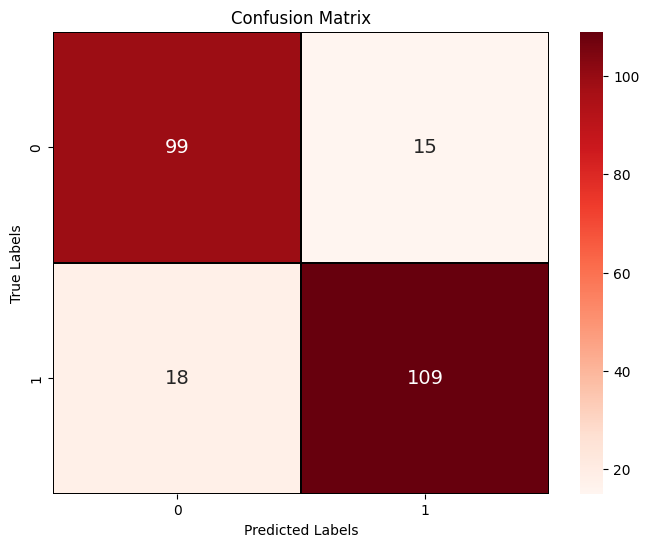

In [ ]:
cm_3 = confusion_matrix(y_test, prediction_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_3, annot=True, cmap='Reds', fmt='d', annot_kws={"size": 14}, linewidths=0.3, linecolor='black')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels',)
plt.title('Confusion Matrix')
plt.show()

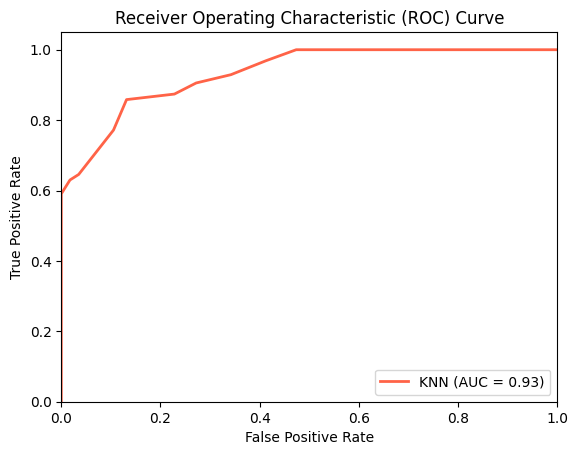

In [ ]:
y_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='tomato', lw=2, label=f'KNN (AUC = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()